In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from iterative_closest_point import stitch_images

In [7]:
def stitch_images_2(image1, image2):
    # Convert images to grayscale
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    
    # Detect keypoints and compute descriptors using ORB
    orb = cv2.ORB_create()
    keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
    keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)
    
    # Match descriptors between the two images
    matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = matcher.match(descriptors1, descriptors2)
    
    # Sort matches by distance
    matches = sorted(matches, key=lambda x: x.distance)
    
    # If there are not enough matches, return None
    if len(matches) < 4:
        return None
    
    # Extract matched keypoints
    src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
    
    # Find Homography
    H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    
    # Warp the second image using the homography matrix
    warped_image = cv2.warpPerspective(image2, H, (image1.shape[1] + image2.shape[1], image2.shape[0]))
    
    # Combine the two images
    warped_image[:, 0:image1.shape[1]] = image1
    
    return warped_image

In [3]:
image1 = cv2.imread('input/s1.jpeg')
image2 = cv2.imread('input/s2.jpeg')

In [4]:
result = stitch_images(image1, image2)

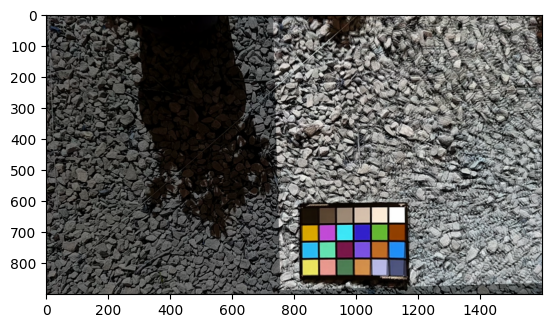

In [5]:
plt.imshow(result)

In [6]:
cv2.imwrite("output/output.jpeg", result)

True